# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ΑΣΚΗΣΗ 4
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Βασίλης Πουλος 
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Κωστάκης Ελευθέριος-Παναγιώτης, 2741


## $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ΕΡΩΤΗΜΑ Α

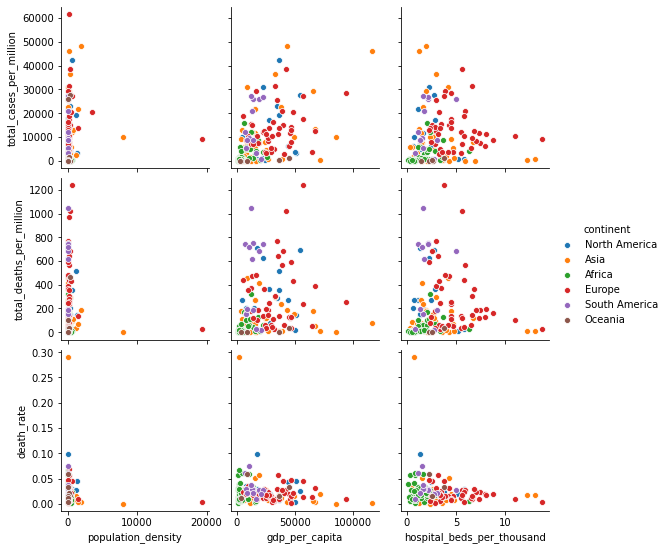

In [26]:
## QUESTION A) start ---

import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])




#### Από τα διαγράμματα του `population_density` βλέπουμε ότι δεν μπορούμε να βγάλουμε κάποιο συμπέρασμα διότι υπάρχει μεγάλο εύρος τιμών. Κάτι που φαίνεται και πιο καθαρά στο παρακάτω ιστόγραμμα. (power-law distribution) Αυτό συμβαίνει γιατί έχουμε μεγάλο πλήθος πολύ μικρών τιμών [0,1000] ταυτόχρονα με τιμές πολύ μεγάλες (outliers) κοντά στο 10.000 και 20.000 όπως φαίνεται οι οποίες μας 'χαλούν' την κανονικότητα της κατανομής.
#### Για να καταλάβουμε το είδος της κατανομής θα πρέπει να πάρουμε το log-log plot, όπως και ζητείται παρακάτω.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd1c7f39d0>]],
      dtype=object)

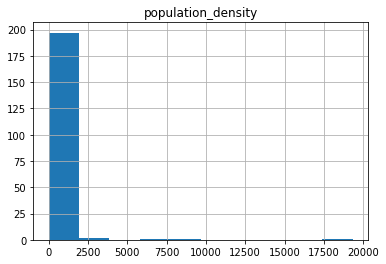

In [27]:
df.hist(column='population_density')

### Βοηθητηκές συναρτήσεις για τους υπολογισμούς του Pearson Correlation Coefficient και των p-values.

In [28]:
# Pearson Correlation Coefficient and p-values function
from scipy.stats import pearsonr

def correlationCoefficient(flag=0):
    values = []
    if flag==0:
        pair1 = df.dropna(subset = ['population_density', 'death_rate'], how ='any')
        values.append(pearsonr(pair1.population_density, pair1.death_rate))

        pair2 = df.dropna(subset = ['population_density', 'total_deaths_per_million'], how ='any')
        values.append(pearsonr(pair2.population_density, pair2.total_deaths_per_million))

        pair3 = df.dropna(subset = ['population_density', 'total_cases_per_million'], how ='any')
        values.append(pearsonr(pair3.population_density, pair3.total_cases_per_million))
    
    elif flag==1:
            pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
            values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

            pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
            values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

            pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
            values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))
    
    pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
    values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

    pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
    values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

    pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
    values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

    pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
    values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

    pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
    values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

    pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
    values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
    
    printPearson(values, flag)

from prettytable import PrettyTable
def printPearson(values, flag):
    t = PrettyTable(['Pearson Correlation Coefficient','death_rate', 'total_deaths_per_million','total_cases_per_million'])
    if flag==0: t.add_row(['population_density', values[0][0], values[1][0],values[2][0]])
    else: t.add_row(['log_population_density', values[0][0], values[1][0],values[2][0]])
    t.add_row(['gdp_per_capita', values[3][0], values[4][0], values[5][0]])
    t.add_row(['hospital_beds_per_thousand', values[6][0], values[7][0], values[8][0]])
    print(t)
    t = PrettyTable(['p-value', 'death_rate', 'total_deaths_per_million','total_cases_per_million'])
    if flag==0: t.add_row(['population_density', values[0][1], values[1][1],values[2][1]])
    else: t.add_row(['log_population_density', values[0][1], values[1][1],values[2][1]])
    t.add_row(['gdp_per_capita', values[3][1], values[4][1], values[5][1]])
    t.add_row(['hospital_beds_per_thousand', values[6][1], values[7][1], values[8][1]])
    print(t)

### Αποτελέσματα του PCC&p-values.

In [29]:
correlationCoefficient()

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|        population_density       | -0.10000651310915307 |  -0.058397547975040334   |   0.062125559569446515  |
|          gdp_per_capita         | -0.14965474185667882 |    0.2541340058740727    |    0.5159806204623202   |
|    hospital_beds_per_thousand   |  -0.184789549051784  |   0.05864998409761146    |    0.1423786439787726   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

## Pearson Correlation Coefficient
$\;\;\;$Από τις μετρήσεις των Pearson Correlation Coefficients βλέπουμε αν υπάρχει κάποια δυνατή- ή όχι- γραμμική συσχέτιση μεταξύ των δεικτών και των χαρακτηριστικών μας. Έτσι παρατηρούμε ότι δεν υπάρχει κάποια απόδειξη ότι υπάρχει συσχέτιση μεταξύ του δείκτη ***total_deaths_per_million*** και των ***hospital_beds_per_thousand***, ***population_density***, ενώ για τον ίδιο δείκτη ως προς το ***gdp_per_capita*** υπάρχει μια μικρή συσχέτιση. 
<br>$\;\;\;$Για τον δείκτη ***death_rate*** οι συσχετίσεις με τα χαρακτηριστικά ***population_density*** και ***gdp_per_capita*** είναι αμελητέες, ενώ θα μπορούσε να υπάρχει μια μικρή αρνητική συσχέτιση με το ***hospital_beds_per_thousand***. <br> $\;\;\;$Για τον δείκτη ***total_cases_per_million*** και το ***gdp_per_capita*** υπάρχει δυνατή συσχέτιση. Αυτό σημαίνει ότι μπορούμε να θεωρήσουμε ότι όσο αυξάνει το ένα αυξάνει και το άλλο, χωρίς όμως αυτό να είναι ο μοναδικός λόγος που συμβαίνει αυτό, δηλαδή δεν είναι σίγουρο ότι η αύξηση του ***total_cases_per_million*** ευθύνεται άμεσα στις περιοχές που είναι αυξημένο και το ***gdp_per_capita***, καθώς για τα ***population_density*** και ***hospital_beds_per_thousand*** είναι ασφαλές να θεωρήσουμε ότι δεν υπάρχει κάποια αξιοσημείωτη συσχέτιση.<br> $\;\;\;$
## p-values
$\;\;\;$Τα p-values μας λένε ουσιαστηκά κατά πόσο τα αποτελέσματα των υπολογισμών παρουσιάζουν στατιστικό ενδιαφέρον. Τα ζευγάρια που μας ενδιαφέρουν είναι αυτά με p-values μεταξύ ***x<=0.01, x<=0.05*** και ***x<=0.1***. Σύμφωνα με αυτό ο δείκτης ***death_rate*** και τα ***gdp_per_capita*** και ***hospital_beds_per_thousand*** παρουσιάζουν στατιστικό ενδιαφέρον ενώ και το ζευγάρι ***total_deaths_per_million*** και ***gdp_per_capita*** παρουσιάζει ενδιαφέρον. <br>$\;\;\;$Επίσης ενδιάφερον υπάρχει στον δείκτη ***total_cases_per_million*** και ***hospital_beds_per_thousand***, ενώ η πιο δυνατή σχέση των υπολογισμών που παρατηρούμε είναι για τον ίδιο δείκτη και το ***gdp_per_capita***.
## Σύνοψη 
<br>$\;\;\;$Από όλα τα παραπάνω ενδιαφέρον για περαιτέρω μελέτη υπάρχει κυρίως στα ζευγάρια **<gdp_per_capita,total_deaths_per_million>** και **<gdp_per_capita,total_deaths_per_million>** και αυτό διότι ενώ παρουσιάζουν μια συσχέτιση μεταξύ τους αλλά επίσης είναι και στατιστικά ενδιαφέρον σύμφωνα με τις τιμές των p-values που έχουν.
<br><br>$\;\;\;$*Προφανώς τα παραπάνω είναι κάποιες υποθέσεις οι οποίες υπάρχει περίπτωση να μην ισχύουν γιατί οι υπολογισμοί προϋποθέτουν κανονική κατανομή των συνόλων δεδομένων μας, κάτι που δεν ισχύει για όλους τους δείκτες και τα χαρακτηριστηκά που μελετούμε.*

### Επανάληψη των υπολογισμών αυτήν την φορά για τον λογάριθμο του `population_density`

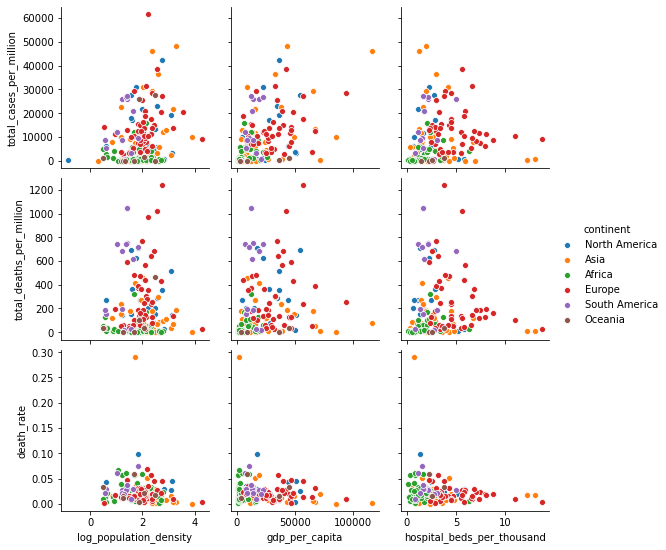

In [30]:
# Take the log of population_density
df['log_population_density'] = np.log10(df['population_density'])
df = df.drop(columns = ['population_density'])

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [31]:
# Calculate new Pearson Correlation Coefficients and p-values for log_population_density
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|      log_population_density     | -0.13084081983701423 |   0.01163448498135465    |   0.19801683582445173   |
|          gdp_per_capita         | -0.14965474185667882 |    0.2541340058740727    |    0.5159806204623202   |
|    hospital_beds_per_thousand   |  -0.184789549051784  |   0.05864998409761146    |    0.1423786439787726   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

## Pearson Correlation Coefficient & p-values
$\;\;\;$Μετά την αλλαγή παρατηρούμε μια μεγάλη αλλαγή στον δείκτη ***total_cases_per_million*** όπου πλέον υπάρχει μια σίγουρα πιο δυνατή συσχέτιση με τον λογάριθμο του ***population_density***.
Επίσης παρατηρούμε τεράστια αλλαγή στον δείκτη p-value του ζευγαριού **<population_density,total_cases_per_million**> που σημαίνει ότι πιθανότατα παρουσιάζουν στατιστικό ενδιαφέρον.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd1c46ec40>]],
      dtype=object)

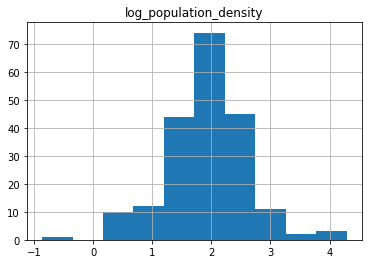

In [32]:
df.hist(column='log_population_density')

#### Απο το ιστόγραμμα βλέπουμε ότι παίρνοντας το log-log plot μειώθηκε δραστικά το εύρος τιμών και τα δεδομένα μας δείχνουν να ακολουθούν την κανονική κατανομή, κατί το οποίο θέλουμε.

$\;\;\;$Για τις χώρες της Αφρικής παρατηρούμε ότι δεν υπάρχουν μεγάλες διακυμάνσεις ως προς τους δείκτες και τα χαρακτηριστικά, δηλαδή σε αντίθεση με τις υπόλοιπες ηπείρους βλέπουμε ότι οι χώρες της Αφρικής είναι συσσωρευμένες σε συγκεκριμένα διαστήματα τιμών, δεν υπάρχουν πολλές ακραίες τιμές μεταξύ των χωρών της, κάτι που δεν ισχύει για τις υπόλοιπες ηπείρους που όπως φαίνεται στα διαγράμματα μεταξύ ίδιων ηπείρων υπάρχουν πολύ περισσότερες ακραίες τιμές(outliers), κάτι που δεν ισχύει για την Αφρική, όπως φαίνεται ξεκάθαρα και στα παρακάτω ιστογράμματα.<br>
$\;\;\;$Πιο απλοϊκά βλέπουμε στα διαγράμματα ότι ενώ χώρες διαφορετικών ηπείρων 'απλώνονται' σε όλο το μήκος και πλάτος των διαγραμμάτων, οι χώρες της Αφρικής είναι μαζεμένες χωρίς να έχουν ακραίες περιπτώσεις. Αν πάρουμε τα log-log plots των δεικτών και κάποιων χαρακτηριστικών της Αφρικής θα είμαστε πολύ πιο κοντά σε μια κανονικά κατανομή σε σύγκριση με τις άλλες ηπείρους όπου οι δείκτες και τα χαρακτηριστικά τους έχουν πολύ μεγαλύτερό εύρος τιμών. Οι χώρες μεταξύ της Αφρικής μοιάζουν περισσότερο μεταξύ τους, κάτι που δεν συμβαίνει στις υπόλοιπες ηπείρους.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd1c3d8220>]],
      dtype=object)

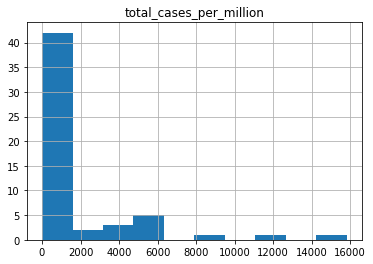

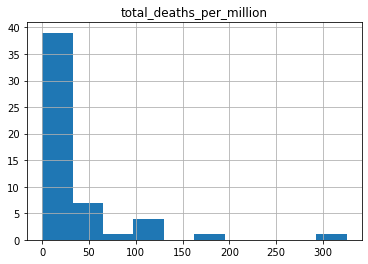

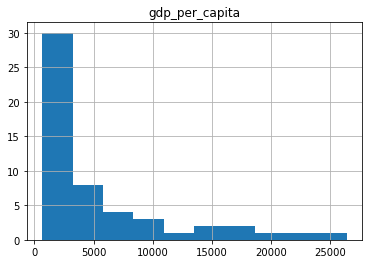

In [33]:
africa = df.loc[df.continent=='Africa']
africa.hist(column='total_cases_per_million')
africa.hist(column='total_deaths_per_million')
africa.hist(column='gdp_per_capita')

### Αφαίρεση των χωρών της Αφρικής.

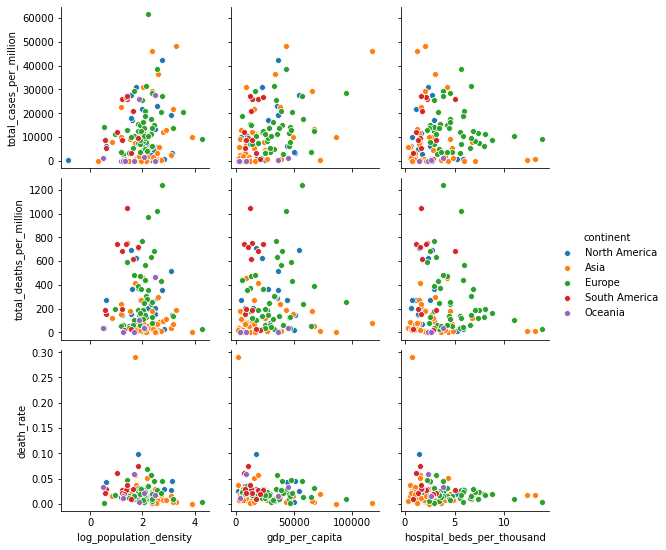

In [34]:
# Without African continent
df = df.loc[df.continent != 'Africa']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [35]:
# Calculate again the Pearson Correlation Coefficient and p-values without African continent
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|      log_population_density     | -0.14181218461421508 |   -0.0829348431486697    |    0.1728580247964166   |
|          gdp_per_capita         | -0.1922099702749785  |   0.07905175694387796    |    0.417222039331797    |
|    hospital_beds_per_thousand   | -0.20740573139650811 |   -0.08403396676290859   |   0.00961541337152054   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

$\;\;\;$Χωρίς την Αφρική παρατηρούμε αναμενόμενη μείωση της συσχέτισης μεταξύ του **gpd_per_capita** και **total_deaths_per_million**, καθώς έχει τις μικρότερες τιμές **gpd_per_capita**. Αυτό βέβαια είναι χρήσιμο για την ανάλυση μας, διότι πριν την αφαίρεση της Αφρικής κάποις θα έλεγε ότι υπάρχει καλή περίπτωση συσχέτισης αυτών των δυο (δείκτης-χαρακτηριστικό), παρ' όλα βλέπουμε ότι σε αυτό το αποτέλεσμα του υπολογισμού του Pearson correlation coefficient έπαιζε πολύ μεγάλο ρόλο η Αφρική. Πλέον βλέπουμε ότι δεν υπάρχει συσχέτιση αυτών των δυο ούτε κάποιαο στατιστικό ενδιαφέρον. Επίσης βλέπουμε ότι το **hospital_beds_per_thousand** και τον **total_cases_per_million** δεν υπάρχει επίσης κάποιο στατιστικό ενδιαφέτον καθώς οι χώρες της αφρικής έχουν και εκεί τον μικρότερο αριθμό κρεβατιών κάτι που έμοιαζε να επηρεάζει τον δείκτη **total_cases_per_million**, κάτι που προφανώς βλέπουμε πλέον ότι δεν έχει καμία σημασία.<br>
$\;\;\;$Επομένως συνολικά βλέπουμε ότι οι χαμηλές ακραίες τιμές της ηπείρου της Αφρικής θα μας οδηγούσαν σε λάθος συμπεράσματα για διάφορα χαρακτηριστικά και το πως επηρεάζονται οι δείκτες από αυτά σε σχέση με τον υπόλοιπο κόσμο. Θα ήταν καλύτερο να βλέπαμε κάθε ήπειρο ξεχωριστά για να αποκτήσουμε μια πιο καθαρή εικόνα.

### Επανάληψη των υπολογισμών αυτήν την φορά μόνον για την Ευρώπη.

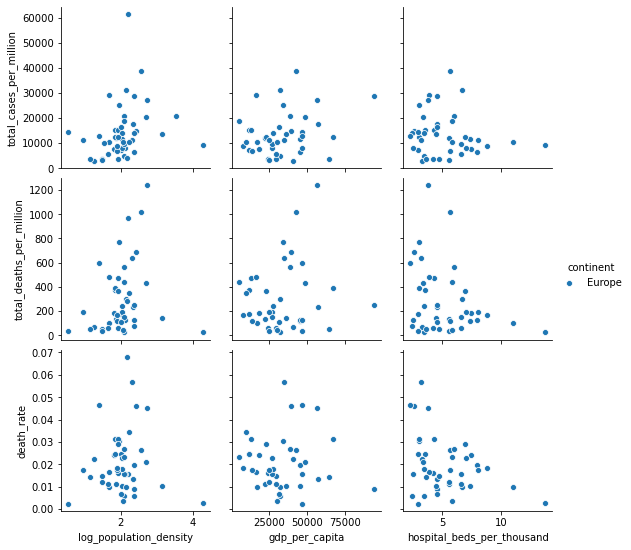

In [36]:
# Only European countries
df = df.loc[df.continent == 'Europe']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [37]:
# Calculate again the Pearson Correlation Coefficient and p-values for Europe
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|      log_population_density     | 0.042240445009964586 |   0.22559693306395764    |    0.2418379253659753   |
|          gdp_per_capita         | -0.00805627790140381 |   0.15090242575512589    |   0.25657713292004464   |
|    hospital_beds_per_thousand   | -0.33914442154125063 |   -0.2759067046225694    |   -0.13101030755302753  |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+---------------------+--------------------------+-------------------------+
|          p-value           |      death_rate     | total_deaths_per_million | total_cases_per_million |
+---

$\;\;\;$Αρχικά παρατηρούμε ότι η Ευρώπη είναι το αντίθετο της Αφρικής- δηλαδή οι χώρες της έχουν το μεγαλύτερο εύρος τιμών για τα κάθε ζευγάρι <χαρακτηριστικό, δείκτης>. 'Απλώνονται' περισσότερο από κάθε άλλη ήπειρο, δείχνοντας μια ανομοιογένεια και ότι είναι μια ήπειρος με χώρες "διαφορετικών ταχυτήτων"(ως προς τα ζευγάρια τιμών). Σε σύγκριση με τις αρχικές μετρήσεις υπάρχει σημαντική αλλαγή ανάμεσα στην τιμή για τα **hospital_beds_per_thousand** και το **death rate** όπου συσχετίζονται αρνητικά, δηλαδή όσο η τιμή του χαρακτηριστικού αυξάνει η τιμή μας μειώνεται, χωρίς πάλι αυτό να γίνεται μοναδικά για αυτόν τον λόγο. Για το ίδιο χαρακτηριστικό παρατηρούμε μια πολύ μεγάλη αλλαγή πάλι όσον αφορά την τιμή **total_deaths_pers_million**, όπου και εκεί βλέπουμε να δημιουργείτε μια αρνητική συσχέτιση, όπως και για τον δείκτη **total_cases_per_million** σε μικρότερο βαθμό.<br> <br>
$\;\;\;$Οσον αφορά τα **p_values** παρατηρούμε σημαντικές αλλαγές για το **log_population_density** όπου σε σχέση με πρίν αλλάζει δραστικά για τους δείκτες **death_rate** και **total_cases_per_million**, δείχντοντάς μας έτσι ότι *δεν* υπάρχει πιθανών στατιστικό ενδιαφέρον για αυτές τις μετρήσεις. Το ίδιο συμβαίνει ως προς κάθε δείκτη και για το χαρακτηριστικό **gdp_per_capita** όπου βλέπουμε ότι για την Ευρώπη δεν δείχνει να παρουσιάζει κάποιο λόγο για περεταίρω μελέτη. Τέλος για το χαρακτηριστικό **hospital_beds_per_thousand** βλέπουμε διαφορά με τα αρχικά αποτελέσματα στον δείκτη **total_deaths_per_million** όπου για την Ευρώπη ίσως παρουσιάζει στατιστικό ενδιαφέρον ενώ αρχικά δεν υπήρχε περίπτωση για κάτι τέτοιο- αντίθετα για τον **total_cases_per_million** συμβαίνει το αντίστροφο πριν έδειχνε να παρουσιάζει ενδιαφέρον ενώ για την Ευρώπη δεν υπάρχει καμία τέτοια ένδειξη σύμφωνα με την τιμή του p-value.

## $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ΕΡΩΤΗΜΑ Β

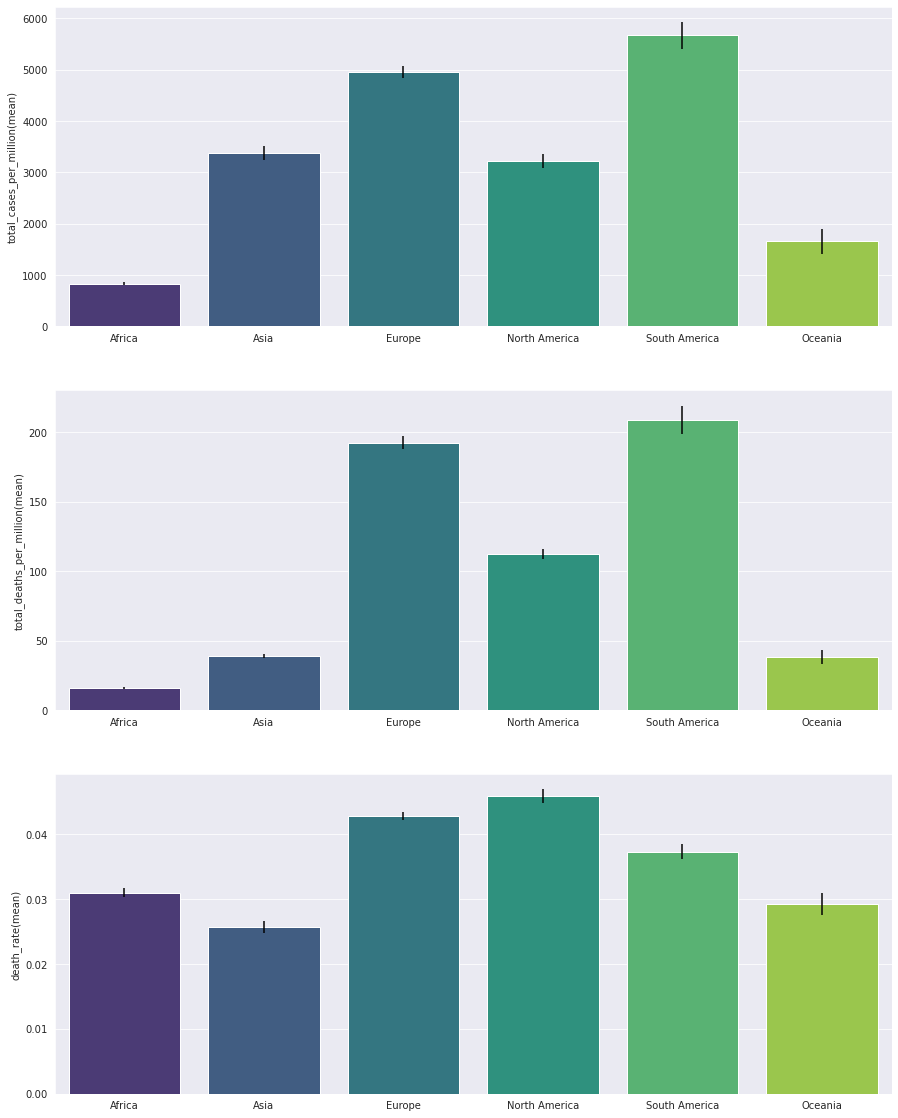

In [21]:
## QUESTION B) start ---
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']


means_per_continent = []
error_per_continent = []
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

# Find means for the columns we need
for i in continents:
    df_per_continent = df.loc[df.continent == i]
    means_per_continent.append([df_per_continent['total_cases_per_million'].mean(),
                                df_per_continent['total_deaths_per_million'].mean(),
                                df_per_continent['death_rate'].mean()])
    error_per_continent.append([2*df_per_continent['total_cases_per_million'].sem(),
                                2*df_per_continent['total_deaths_per_million'].sem(),
                                2*df_per_continent['death_rate'].sem()])

# Create the DataFrame
df2 = pd.DataFrame(means_per_continent,
                   index =continents,
                   columns = ['total_cases_per_million(mean)', 'total_deaths_per_million(mean)', 'death_rate(mean)'])

# Display the bar plots with error bars
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [x[i] for x in error_per_continent]
    plt.subplot(3,1,i+1)
    if i==0: g =sns.barplot(x= continents, y= 'total_cases_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    elif i==1: g =sns.barplot(x= continents, y= 'total_deaths_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    else: g =sns.barplot(x= continents, y= 'death_rate(mean)', data= df2, yerr= sem_error, palette='viridis')


$\;\;\;$Μια ενδιαφέρουσα παρατήρηση ως εδώ είναι η πολύ μειωμένη τιμή τoυ μέσου όρου του δείκτη *total_deaths_per_million* της Ασίας.

In [22]:
df2

,total_cases_per_million(mean),total_deaths_per_million(mean),death_rate(mean)
Africa,831.266425,15.845250,0.030959
Asia,3369.603168,39.146248,0.025757
Europe,4949.272035,192.222052,0.042789
North America,3220.203768,112.029893,0.045817
South America,5670.275033,208.757890,0.037324
Oceania,1657.675210,38.153290,0.029252


### Υπολογισμός των t-test.

In [32]:
from scipy.stats import ttest_ind
def ttest(cont1, cont2, i):
    if i==0:
        test_cases = ttest_ind(df.loc[df.continent==cont1].total_cases_per_million.values,
                         df.loc[df.continent==cont2].total_cases_per_million.values, nan_policy='omit')
        return ('%.3f'%(test_cases.pvalue))
    elif i==1:
        test_deaths = ttest_ind(df.loc[df.continent==cont1].total_deaths_per_million.values,
                         df.loc[df.continent==cont2].total_deaths_per_million.values, nan_policy='omit')
        return ('%.3f'%(test_deaths.pvalue))
    else:
        test_ratio = ttest_ind(df.loc[df.continent==cont1].death_rate.values,
                         df.loc[df.continent==cont2].death_rate.values, nan_policy='omit')
        return ('%.3f'%(test_ratio.pvalue))

In [33]:
data_ttest = pd.DataFrame(index = continents, columns = continents)
for k in range(3):
    for i in range(6):
        for j in continents:
            data_ttest[j].values[i] = ttest(data_ttest.index[i], j, k)

    if k == 0:
        print('\033[1m'+'\033[4m'+'t-tests for means of total_cases_per_million'+'\033[0m')
        print(data_ttest)
    elif k==1:
        print()
        print('\033[1m'+'\033[4m'+'t-tests for means of total_deaths_per_million'+'\033[0m')
        print(data_ttest)
    else :
        print()
        print('\033[1m'+'\033[4m'+'t-tests for means of death_ratio'+'\033[0m')
        print(data_ttest)

t-tests for means of total_cases_per_million
              Africa   Asia Europe North America South America Oceania
Africa         1.000  0.000  0.000         0.000         0.000   0.000
Asia           0.000  1.000  0.000         0.126         0.000   0.000
Europe         0.000  0.000  1.000         0.000         0.000   0.000
North America  0.000  0.126  0.000         1.000         0.000   0.000
South America  0.000  0.000  0.000         0.000         1.000   0.000
Oceania        0.000  0.000  0.000         0.000         0.000   1.000

t-tests for means of total_deaths_per_million
              Africa   Asia Europe North America South America Oceania
Africa         1.000  0.000  0.000         0.000         0.000   0.000
Asia           0.000  1.000  0.000         0.000         0.000   0.645
Europe         0.000  0.000  1.000         0.000         0.002   0.000
North America  0.000  0.000  0.000         1.000         0.000   0.000
South America  0.000  0.000  0.002         0.000        

$\;\;\;$Για τις τιμές των μέσων όρων των δεικτών **total_cases_per_million** για κάθε ήπειρο παρατηρούμε ότι το Null Hypothesis δεν απορρίπτεται -δηλαδή αυτές οι διαφορές των μέσων όρων δεν είναι στατιστικά σημαντικές- μεταξύ των ηπείρων Asia-North America. Αυτό είναι ορατό και στο γράφημα όπου στην μπάρα για το standard error των δυο ηπείρων υπάρχει overlap και το t-test έρχεται να επιβεβαιώση την οπτική υποψία.<br>
$\;\;\;$Για τις μέσες τιμές του **total_deaths_per_million** δεν παρατηρείται στατιστικό ενδιαφέρον για τις ηπείρους Οκεανία και Ασία διότι η τιμή του p-value είναι μεγαλύτερη από 0,05. Ενώ για τον δείκτη **death_ratio** αυτό παρατηρείται μεταξύ των ηπείρων της Οκεανίας και της Αφρικής. Και στις δυο περιπτώσεις παρατηρείται επίσης overlap των error bars στα παραπάνω διαγράμματα.<br><br>
*Για τα παραπάνω διαγράμματα και για τους υπολογισμούς των t-tests υποθέτουμε ότι υπάρχει κανονική κατανομή των δεδομένων μας, για αυτό θεωρούμε ως το το 95% του confidence intervals στα error bars το διάστημα (μ-2*se, μ+2*se)*

## $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ΕΡΩΤΗΜΑ Γ

In [107]:
## QUESTION C) start ---

import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','new_cases',
          'new_deaths']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Get datetime objects from date column
df = df.loc[df.location != 'International']
df = df.loc[df.location != 'World']
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.sort_values(by = ['date', 'iso_code'])


#### Υπολογισμός των νέων κρουσμάτων,  νέο συνολικό αριθμό θανάτων, και τον λόγο τους για όλες τις ηπείρους.


In [108]:
from scipy import stats
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
np.seterr(all='ignore')
error = []

for i in range(1,12):
    data = df.loc[df.month == i]   
    ratio_today = data.new_deaths.values/data.new_cases.values

    cases_monthly.append(data.new_cases.mean())
    deaths_monthly.append(data.new_deaths.mean() )
    ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(data.new_deaths.values/data.new_cases.values)])))
    error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])


In [109]:
# Creating the dataframe we want for our visualization
from datetime import datetime
new_df = pd.DataFrame({'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly, 'ratio_monthly':ratio_monthly})
new_df.index+=1
months = np.array([])

for x in new_df.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
    
new_df = new_df.set_index(months)
new_df.index.name = 'month'


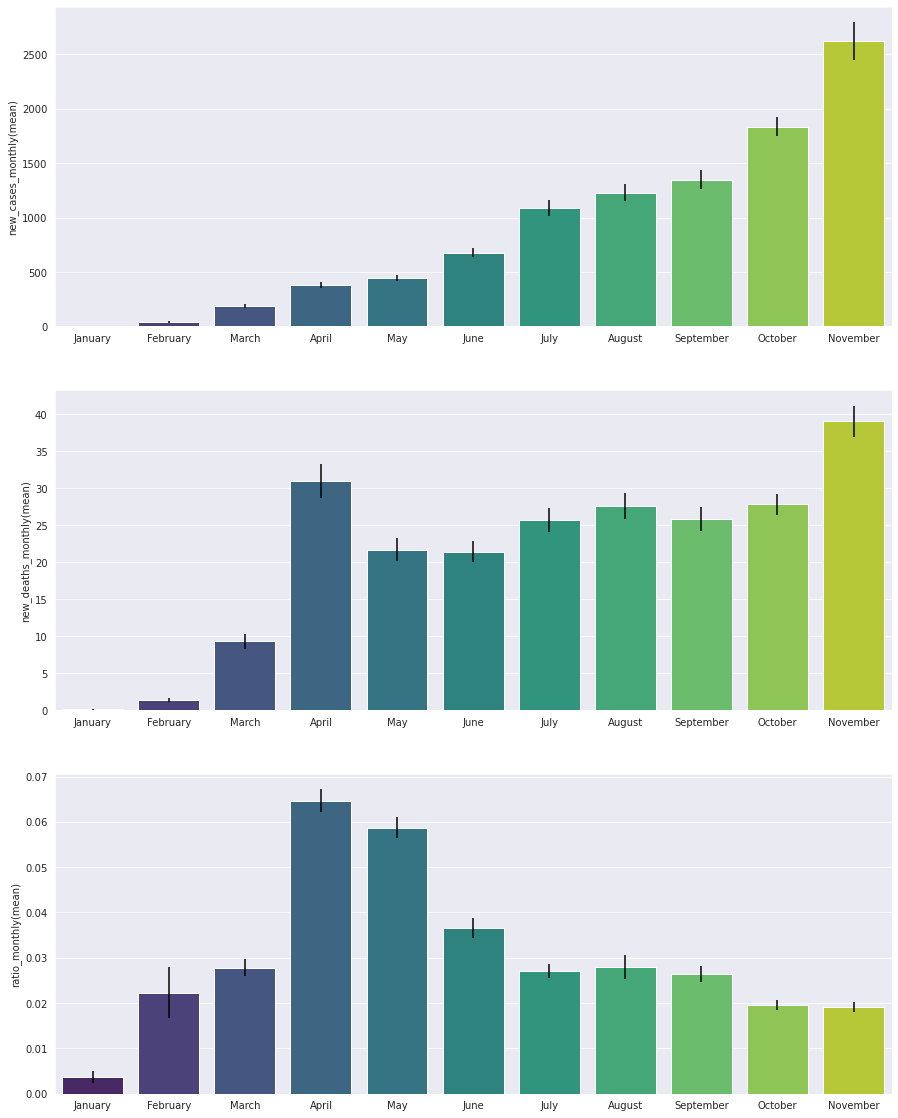

In [110]:
# Display our bar plots for all continents together
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [x[i] for x in error]
    plt.subplot(3,1,i+1)
    if i==0:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_cases_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_cases_monthly(mean)')
    elif i==1:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_deaths_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_deaths_monthly(mean)')
    else:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.ratio_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='ratio_monthly(mean)')

### Ο αριθμός των κρουσμάτων αυξάνεται εκθετικά.

Text(0.5, 1.0, 'NEW CASES MONTHLY')

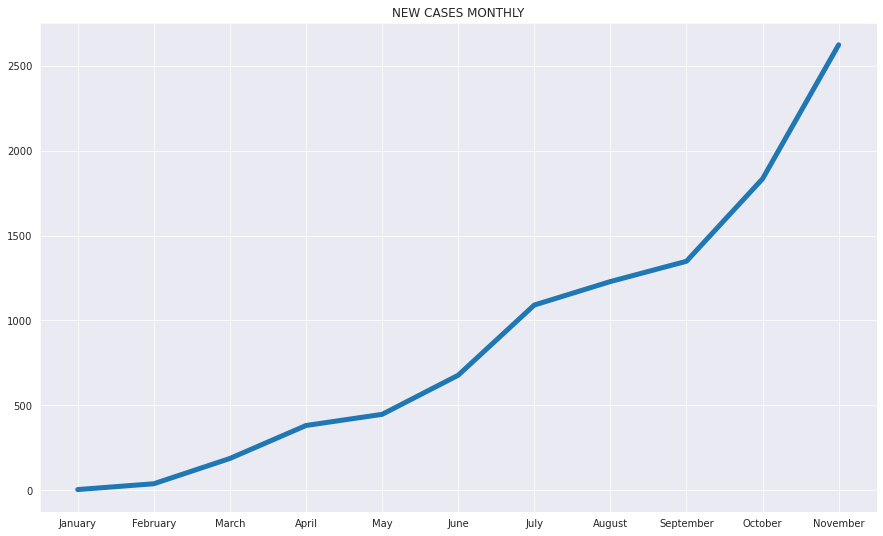

In [125]:
fig = plt.figure(figsize=(15,9))
g = sns.lineplot(data=new_df, x=new_df.index.tolist(), y=new_df.new_cases_monthly.tolist(), linewidth=5, sort=False)
g.set_title("NEW CASES MONTHLY")

#### Υπολογισμός των νέων κρουσμάτων,  νέο συνολικό αριθμό θανάτων, και τον λόγο τους για κάθε ήπειρο ξεχωριστά.


In [19]:
# Do the same process but for each continent separately
from scipy import stats
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
error = []
np.seterr(all='ignore')

for i in range(1,12):
    
    for j in range(len(continents)):
        data = df.loc[df.month == i]
        data = data.loc[data.continent == continents[j]]
        # Actually here we calc the mean of cases and deaths and death ratio for each month
        # We could do a big for-loop to parse day-by-day, but the result would be pretty much the same
        # because python gives us huge decimal precision. The difference finding the mean by using sum()
        # for a month than calculate the mean of cases or deaths day by day is: +- 0.0000000001,
        # so no point to parse a month day by day.
        ratio_today = data.new_deaths.values/data.new_cases.values

        cases_monthly.append(data.new_cases.mean())
        deaths_monthly.append(data.new_deaths.mean())
        ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


        error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])

<ipython-input-19-512e89215428>:24: RuntimeWarning: Mean of empty slice
  ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


In [20]:
# Creating the dataframe we need for the visualization
from datetime import datetime
df_continents = pd.DataFrame({'continent':continents*11,'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly,
                              'ratio_monthly':ratio_monthly})

df_continents['sem_new_cases'] = [x[0] for x in error]
df_continents['sem_new_deaths'] = [x[1] for x in error]
df_continents['sem_ratio'] = [x[2] for x in error]

df_continents.to_csv(r'/home/left/Desktop/test.csv')

In [22]:
# This dataframe has 66 rows, because we have 6 continents X 11 months,
# First 6 rows are continents data for January,
# Last 6 rows are continents data for November, etc.
df_continents.tail()

,continent,new_cases_monthly,new_deaths_monthly,ratio_monthly,sem_new_cases,sem_new_deaths,sem_ratio
61,Asia,2013.185990,33.553140,0.015288,223.984237,3.439091,0.00115101
62,Europe,5191.874317,75.178142,0.014701,316.771954,5.009575,0.00111704
63,North America,3947.537037,44.577160,0.023243,852.974290,7.950036,0.00252397
64,Oceania,32.407767,0.233010,0.002795,8.980727,0.077373,0.000824689
65,South America,3479.401709,78.115385,0.036600,459.364110,9.671712,0.00575986


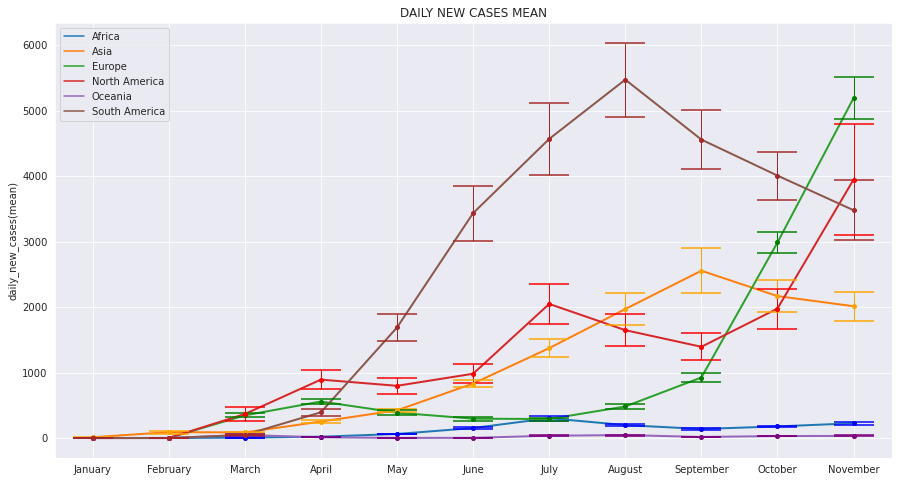

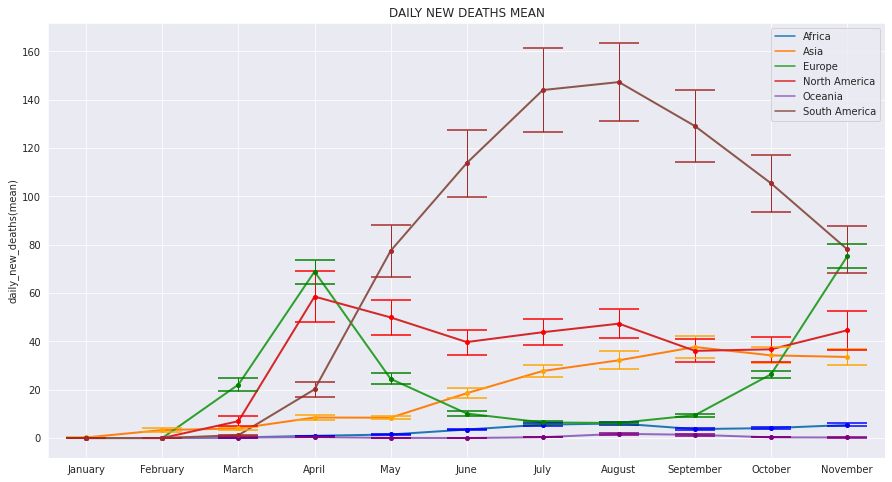

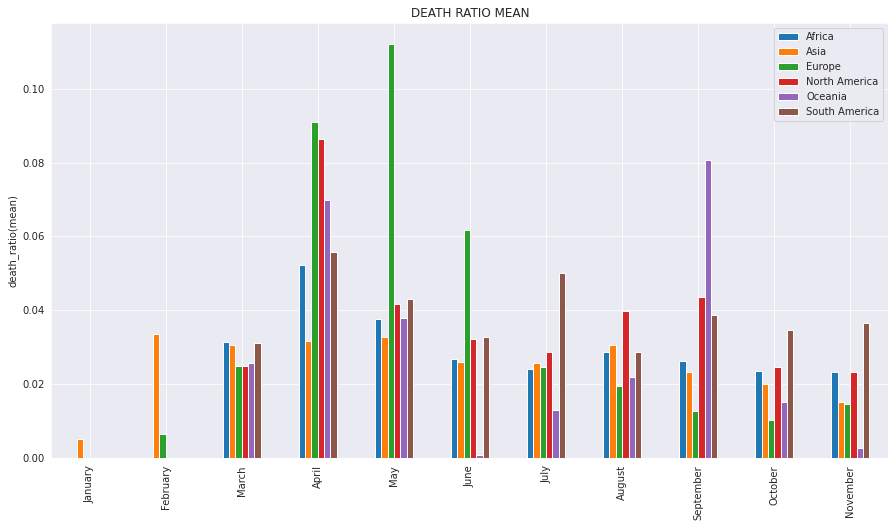

In [23]:
# Now for display all plots using line plots for new_cases_monthly and new_deaths_monthly
# and a bar plot for death_ratio_monthly. That's because Standard Error of the Mean ratio
# is something like 0.000x and with a line plot it is a big confusion.
sns.set_style("darkgrid")
for i in range(3):
    if i == 0:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].new_cases_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].new_cases_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].new_cases_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].new_cases_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].new_cases_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].new_cases_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])

        values=[final['Africa'].values,final['Asia'],final['Europe'],final['North America'],final['Oceania'],final['South America']]

        yerror =[df_continents.loc[df_continents.continent=='Africa'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Asia'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Europe'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='North America'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Oceania'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='South America'].sem_new_cases.values]
        colors=['blue','orange','green','red','purple','brown']

        fig = plt.figure(figsize=(15,8))
        plt.title("DAILY NEW CASES MEAN")
        sns.lineplot(data= final, sort= False, dashes = False, linewidth = 2)
        for j in range(len(values)):
            (_,caps,_)=plt.errorbar(x=range(len(final.index)), y=values[j],elinewidth=1,ecolor=colors[j],
                         yerr=yerror[j],fmt='.',marker='.',markersize=8, capsize=20, mec=colors[j],mfc=colors[j]);
            for cap in caps:
                cap.set_markeredgewidth(1.5)

        plt.ylabel("daily_new_cases(mean)")

    elif i == 1:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].new_deaths_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].new_deaths_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].new_deaths_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].new_deaths_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].new_deaths_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].new_deaths_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])

        values=[final['Africa'].values,final['Asia'],final['Europe'],final['North America'],final['Oceania'],final['South America']]

        yerror =[df_continents.loc[df_continents.continent=='Africa'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Asia'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Europe'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='North America'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Oceania'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='South America'].sem_new_deaths.values]
        colors=['blue','orange','green','red','purple','brown']

        fig = plt.figure(figsize=(15,8))
        plt.title("DAILY NEW DEATHS MEAN")
        sns.lineplot(data= final, sort= False, dashes = False, linewidth = 2)
        for j in range(len(values)):
            (_,caps,_)=plt.errorbar(x=range(len(final.index)), y=values[j],elinewidth=1,ecolor=colors[j],
                         yerr=yerror[j],fmt='.',marker='.',markersize=8, capsize=20, mec=colors[j],mfc=colors[j]);
            for cap in caps:
                cap.set_markeredgewidth(1.5)

        plt.ylabel("daily_new_deaths(mean)")
        
    else:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].ratio_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].ratio_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].ratio_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].ratio_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].ratio_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].ratio_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])
        # Replace masked values to NaN
        final['Africa'].values[0] = None
        final['South America'].values[0] = None
        final['South America'].values[1] = None
        #
        
        # Create the plot
        final.plot(figsize=(15,8),kind='bar')
        plt.title("DEATH RATIO MEAN")
        plt.xlabel(None)
        plt.ylabel("death_ratio(mean)")

## Τι παρατηρείτε για την εξέλιξη της πανδημίας ανά ήπειρο? ---ΕΔΩ

## $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ΕΡΩΤΗΜΑ Δ

In [89]:
## QUESTION D) start ---
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Create the dataframe
# Load the data (create the DataFrame)

df_covid = pd.read_csv('/home/left/Desktop/dataMining/set1/united_states_covid19_cases_and_deaths_by_state.csv',
                       skiprows=3)
df_covid = df_covid.rename(columns={'State/Territory': 'State'})
df_votes = pd.read_excel('/home/left/Desktop/dataMining/set1/state-voting.xlsx')
# DO NEW YORK CITY STUFF
data = pd.merge(df_votes, df_covid, on=['State'], how='inner')
data['death_ratio_per_100K'] = data['Death Rate per 100000'].values / data['Case Rate per 100000'].values

#### Αρχικά οι στήλες που θα πρέπει να κοιτάξουμε για να έχουμε μια πρώτη ιδέα για κάθε πολιτεία είναι τα cases, total deaths και o λόγος τους ανά 100.000 του πληθυσμού. Αυτό διότι στην Αμερική υπάρχουν τεράστιες πληθυσμιακές διαφορές. [Wiki](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population)

In [90]:
votedD = data.loc[data['Vote']=='D']
votedD.reset_index(inplace = True)
votedR = data.loc[data['Vote']=='R']
votedR.reset_index(inplace = True)
sns.set_style("darkgrid")


### $\;\;\;$Αρχικά είναι φανερό ότι οι πολιτείες με τον μεγαλύτερο αριθμό κρουσμάτων ψήφισαν για τους ρεπουμπλικάνους.

[Text(0, 0.5, 'Case Rate per 100K')]

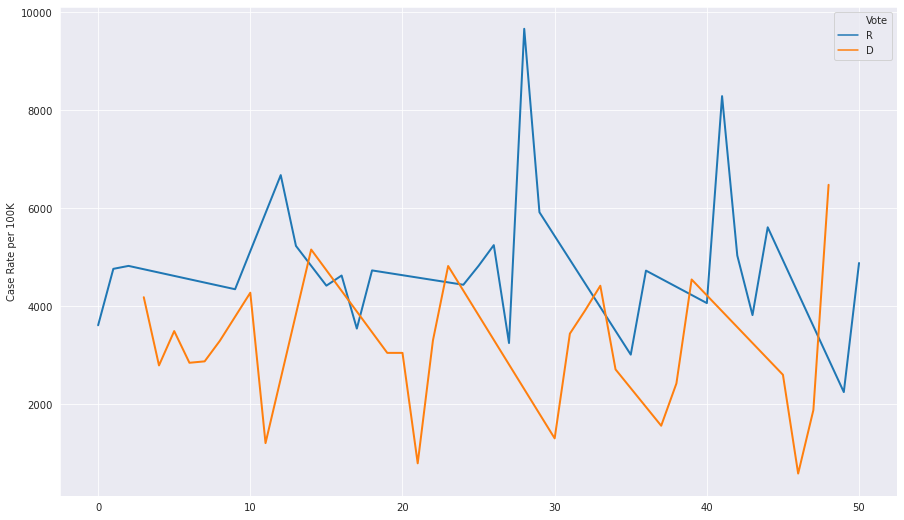

In [91]:
fig = plt.figure(figsize=(15,9))
g = sns.lineplot(data=data, x=data.index.tolist(), hue = data['Vote'],
                 y=data['Case Rate per 100000'].tolist(), sort= False, dashes = False, linewidth = 2)
g.set(ylabel='Case Rate per 100K')

In [107]:
means_for_D = data.loc[data.Vote=='D']
means_for_R = data.loc[data.Vote=='R']

# Barplot values
cases_per_100K_R = means_for_R['Case Rate per 100000'].mean()
deaths_per_100K_R = means_for_R['Death Rate per 100000'].mean()

cases_per_100K_D = means_for_D['Case Rate per 100000'].mean()
deaths_per_100K_D = means_for_D['Death Rate per 100000'].mean()

death_ratio_D = means_for_D['death_ratio_per_100K'].mean()
death_ratio_R = means_for_R['death_ratio_per_100K'].mean()


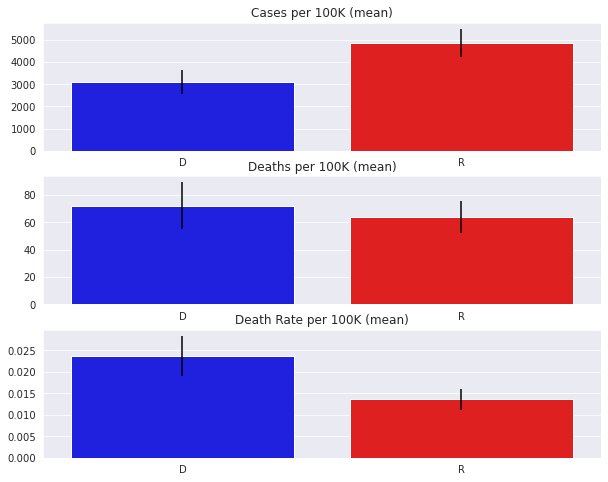

In [116]:
sns.set_style("darkgrid")
y_cases = [cases_per_100K_D,cases_per_100K_R]
y_deaths = [deaths_per_100K_D,deaths_per_100K_R]
y_ratio = [death_ratio_D, death_ratio_R]

fig = plt.figure(figsize=(10,8))
colors = ['blue', 'red']
for i in range(3):
    plt.subplot(3,1,i+1)
    if i==0:
        g = sns.barplot(data = data, x = ['D', 'R'], y=y_cases, palette=colors,
                        yerr= [2*means_for_D['Case Rate per 100000'].sem(),2*means_for_R['Case Rate per 100000'].sem()])
        g.set_title('Cases per 100K (mean)')
    elif i==1:
        g = sns.barplot(data = data, x = ['D', 'R'], y=y_deaths, palette=colors,
                        yerr=[2*means_for_D['Death Rate per 100000'].sem(),2*means_for_R['Death Rate per 100000'].sem()])
        g.set_title('Deaths per 100K (mean)')
    else:
        g = sns.barplot(data = data, x = ['D', 'R'], y=y_ratio, palette=colors,
                        yerr=[2*means_for_D['death_ratio_per_100K'].sem(),2*means_for_R['death_ratio_per_100K'].sem()])
        g.set_title('Death Rate per 100K (mean)')

$\;\;\;$Αρχικά παρατηρούμε τις τιμές των μέσων όρων για κάθε νικητή ανά πολιτεία. Ενώ όπως αρχικά είδαμε στο line plot ότι οι πολιτείες με τα περισσότερα κρούσματα ψήφισαν για τους ρεπουμπλικάνους εδώ βλέπουμε ότι υπάρχει μικρή διαφορά όσον αφορά τις μέσες τιμές για τους θανάτους ανά πολιτεία, με τις πολιτείες με ελαφρά μεγαλύτερο αριθμό νερκών κατά μέσο όρο να ψηφίζουν τους δημοκρατικούς. Όμως υπάρχει μεγάλη διαφορά όσον αφορά το ποσοστό θανάτων σε σχέση με τα κρούσματα όπου πολιτείες με τα μεγαλύτερα ποσοστά ψήφισαν για τους δημοκρατικούς. Για να δούμε αν αυτές οι μετρήσεις είναι στατιστικά σημαντικές θα πρέπει να κάνουμε κάποια τεστ πέραν από τα bar plots.

$\;\;\;$Αρχικά θα δούμε κατά πόσο σχετίζονται οι δείκτες **Case Rate per 100000, **Death Rate per 100000 και death_ratio_per_100K.**

In [131]:
from scipy.stats import pearsonr
data['code'] = data['Vote'].astype('category').cat.codes

pear_cases = pearsonr(data['Case Rate per 100000'], data.code)
pear_deaths = pearsonr(data['Death Rate per 100000'], data.code)
pear_ratio = pearsonr(data['death_ratio_per_100K'], data.code)

pearson_data = pd.DataFrame({'PCC': [pear_cases[0],pear_deaths[0],pear_ratio[0]],
                             'p-value': [pear_cases[1],pear_deaths[1],pear_ratio[1]]},
                            index = ['Case Rate per 100K', 'Death Rate per 100K', 'Death/Case Ratio per 100K'])
pearson_data

,PCC,p-value
Case Rate per 100K,0.516537,0.000104
Death Rate per 100K,-0.112671,0.431166
Death/Case Ratio per 100K,-0.477189,0.000399


$\;\;\;$Βλέπουμε ότι για το **Death Rate per 100K** δεν υπάρχει κάποια συσχέτιση για το αν ψήφισαν R ή D, σε αντίθεση με το **Case Rate per 100K** και τον δείκτη **Death/Case Ratio per 100K** όπου στον πρώτο δείκτη φαίνεται να υπάρχει θετική συσχέτιση δηλαδή όσο αυξάνει ο δείκτης ανά πολιτεία τόσο πιο πιθανό ήταν να ψηφίσουν για συγκεκριμένο κόμμα(εδώ για ρεπουμπλικάνους), στον δείκτη **Death/Case Ratio per 100K** υπάρχει αρνητική συσχέτιση, και επειδή οι τιμές για 'R' ή 'D' είναι ουσιαστικά 0 ή 1, καταλαβαίνουμε ότι αυτός ο δείκτης έπαιξε ρόλο στην έκβαση των εκλογών. Eπίσης και οι δυο δείκτες έχουν στατιστική σημασία καθώς απορρίπτουν το null hypothesis, εφόσον p-value<0.05. Από αυτήν την ανάλυση συμπεραίνουμε ότι ενώ οι πολιτείες με μεγάλο αριθμό κρουσμάτων επί του πληθυσμού τους εξέλεξαν 'R', αντίθετα αυτές με τα μεγαλύτερα ποσοστά 'Death/Case' εξέλεξαν 'D'.<br><br>
*Υποθέτουμε ότι υπάρχει κανονική κατανομή των συνόλων δεδομένων των δεικτών για να ισχύουν τα παραπάνω.*